In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import zipfile
# Create directory to save figures
if not os.path.exists('/root/mcm2023/pic_4'):
    os.makedirs('/root/mcm2023/pic_4')

# Read data
df = pd.read_csv('/root/2023mcm/new_data.csv')

# Columns to plot
columns = ['word_frequency_col', 'consonant_cluster_col', 'vowel_cluster_col', 
           'consonant_vowel_consonant_col', 'count_duplicate_letters_col', 
           'count_duplicate_types_col', 'has_diacritics_col', 'count_similar_words_col']

# Plot figures for each column
for col in columns:
    # Create directory for the current column
    col_dir = f'/root/mcm2023/pic_4/{col}'
    if not os.path.exists(col_dir):
        os.makedirs(col_dir)

    # Histogram
    fig, ax = plt.subplots()
    ax.hist(df[col], bins=20)
    ax.set_title(f"Histogram of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    plt.savefig(f"{col_dir}/histogram.png", bbox_inches='tight')
    plt.close()

    # Scatter plot
    fig, ax = plt.subplots()
    ax.scatter(df[col], df["Contest number"])
    ax.set_title(f"Scatter plot of {col} ")
    ax.set_xlabel(col)
    ax.set_ylabel("Word Frequency")
    plt.savefig(f"{col_dir}/scatter.png", bbox_inches='tight')
    plt.close()

    # QQ plot
    fig, ax = plt.subplots()
    sm.qqplot(df[col], line='s', ax=ax)
    ax.set_title(f"QQ plot of {col}")
    ax.set_xlabel("Theoretical Quantiles")
    ax.set_ylabel("Sample Quantiles")
    plt.savefig(f"{col_dir}/qqplot.png", bbox_inches='tight')
    plt.close()

    # Box plot
    fig, ax = plt.subplots()
    ax.boxplot(df[col], vert=False)
    ax.set_title(f"Boxplot of {col}")
    ax.set_xlabel(col)
    plt.savefig(f"{col_dir}/boxplot.png", bbox_inches='tight')
    plt.close()

# Compress directory
zip_filename = '/root/mcm2023/pic_4.zip'
with zipfile.ZipFile(zip_filename, 'w', compression=zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk('/root/mcm2023/pic_4'):
        for file in files:
            zipf.write(os.path.join(root, file))


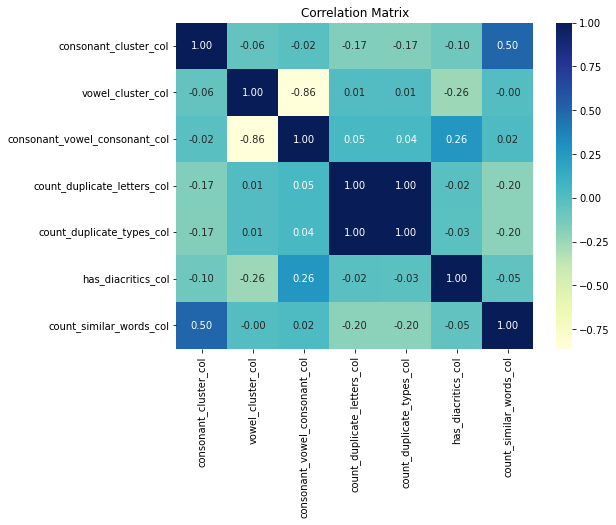

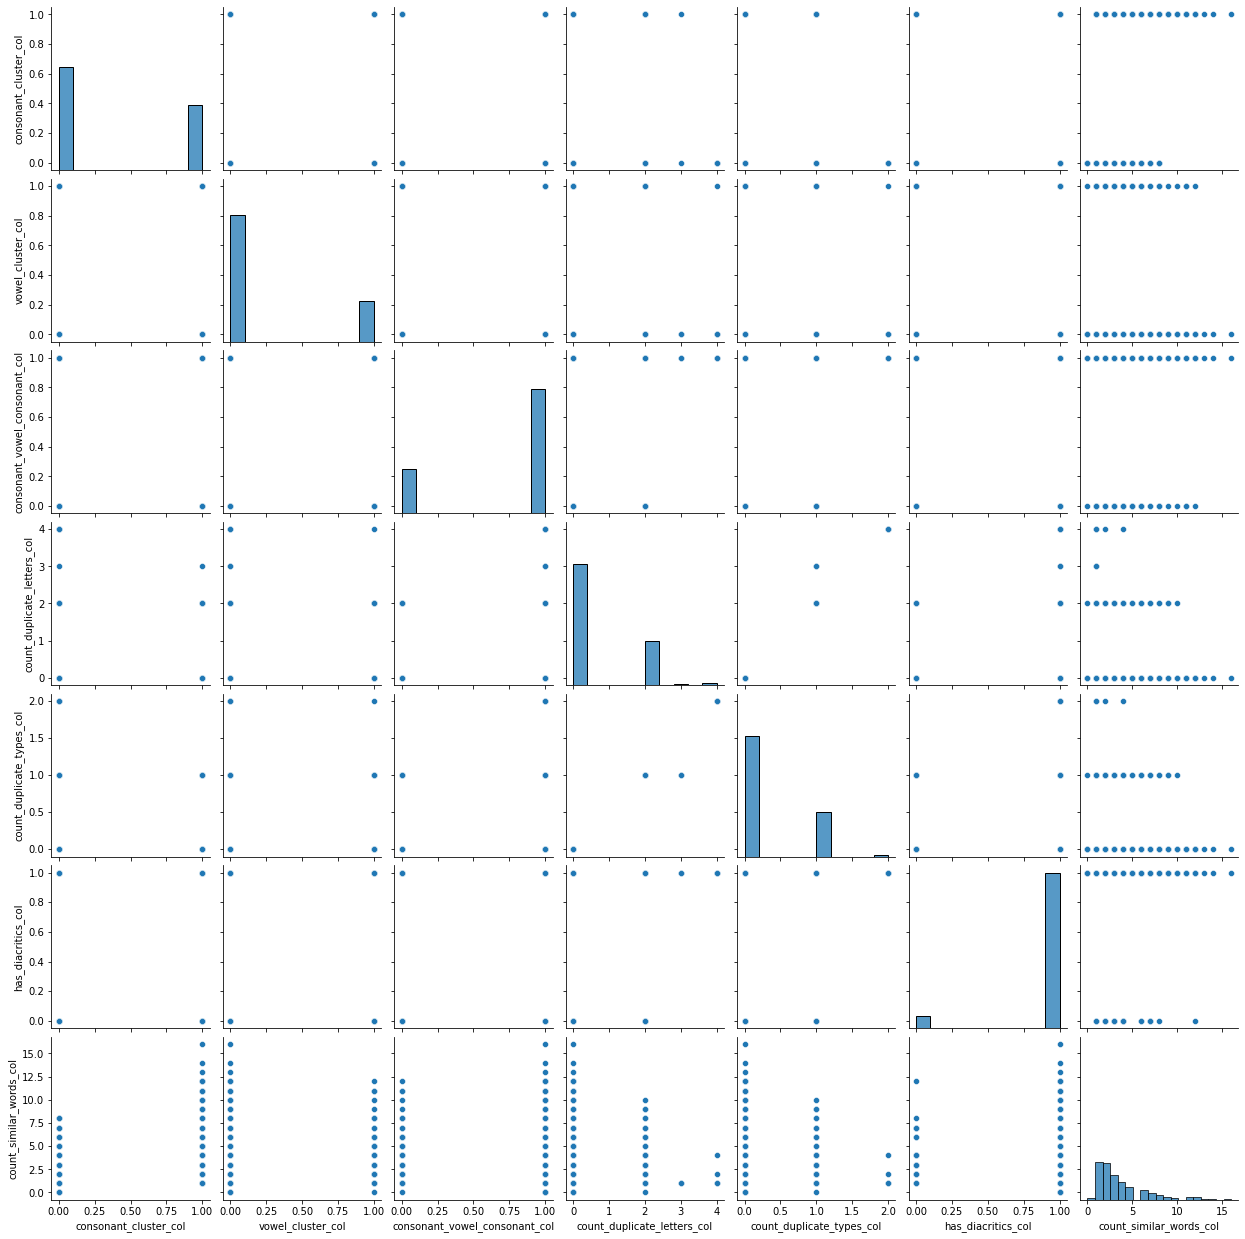

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create directory to save figures
if not os.path.exists('/root/mcm2023/pic_4'):
    os.makedirs('/root/mcm2023/pic_4')

# Read data
df = pd.read_csv('/root/2023mcm/new_data.csv')

# Columns to plot
columns = ['consonant_cluster_col', 'vowel_cluster_col', 
           'consonant_vowel_consonant_col', 'count_duplicate_letters_col', 
           'count_duplicate_types_col', 'has_diacritics_col', 'count_similar_words_col']

plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('/root/mcm2023/pic_4/corr_matrix.png', bbox_inches='tight')
plt.show()

# Define a custom color scheme for the pairplot
colors = ['#FEB2B4', '#FEE4B4', '#C2E4B4', '#B4D3FE', '#E8B4FE', '#B4FEE5', '#FEDCB4', '#B4D1FE']

# Plot pairwise scatterplots with custom color scheme
sns.pairplot(df[columns],palette='#FEA3A2')
plt.savefig('/root/mcm2023/pic_4/pairwise_scatterplots.png', bbox_inches='tight')
plt.show()